## Health-Intellect: A Predictive Diabetes Risk Advisor

**Objective:** To analyze health indicators from the BRFSS2015 dataset to identify key factors associated with diabetes and build a predictive model.

**Student:** Abhay Tiwari  
**Motto:** "Converting raw data into valuable insights."

---

### Part 1: Exploratory Data Analysis (EDA)

In this section, we will load the dataset, perform an initial inspection, and create visualizations to understand the relationships between different health indicators and the presence of diabetes.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix
import xgboost as xgb
import shap
import joblib

In [2]:
df=pd.read_csv('diabetes_data.csv')
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [5]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

#### Analysis of the Target Variable: `Diabetes_binary`

Understanding the distribution of our target variable is the most critical first step in any classification problem. An imbalanced dataset, where one class is much more frequent than the other, can significantly bias the model and requires special techniques to handle.

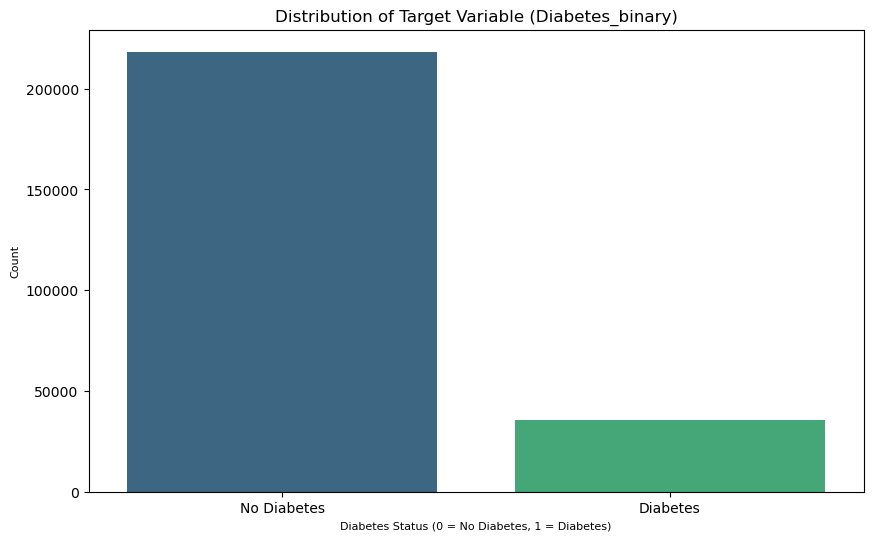

In [6]:
diabetes_counts=df['Diabetes_binary'].value_counts()
diabetes_percentage=df['Diabetes_binary'].value_counts(normalize=True)*100

plt.figure(figsize=(10,6))
ax = sns.countplot(x='Diabetes_binary',data=df,palette="viridis",hue='Diabetes_binary',legend=False)

plt.title('Distribution of Target Variable (Diabetes_binary)',fontsize=12)
plt.xlabel('Diabetes Status (0 = No Diabetes, 1 = Diabetes)',fontsize=8)
plt.ylabel('Count',fontsize=8)
plt.xticks([0,1],['No Diabetes','Diabetes'])
plt.show()

##### Interpretation:

- The dataset is imbalanced. Approximately 86.07% of the individuals in the dataset do not have diabetes, while only 13.93% do.

- This is a crucial finding. Our model might achieve high accuracy by simply predicting "No Diabetes" for everyone. Therefore, we must use evaluation metrics beyond accuracy, such as AUC-ROC, Precision, Recall, and F1-Score, during the modeling phase.



### Univariate Analysis: Understanding Individual Feature Distributions

Let's analyze the key continuous and ordinal features to understand their spread and central tendencies. We'll focus on `BMI`, `GenHlth`, `MentHlth`, and `PhysHlth`.

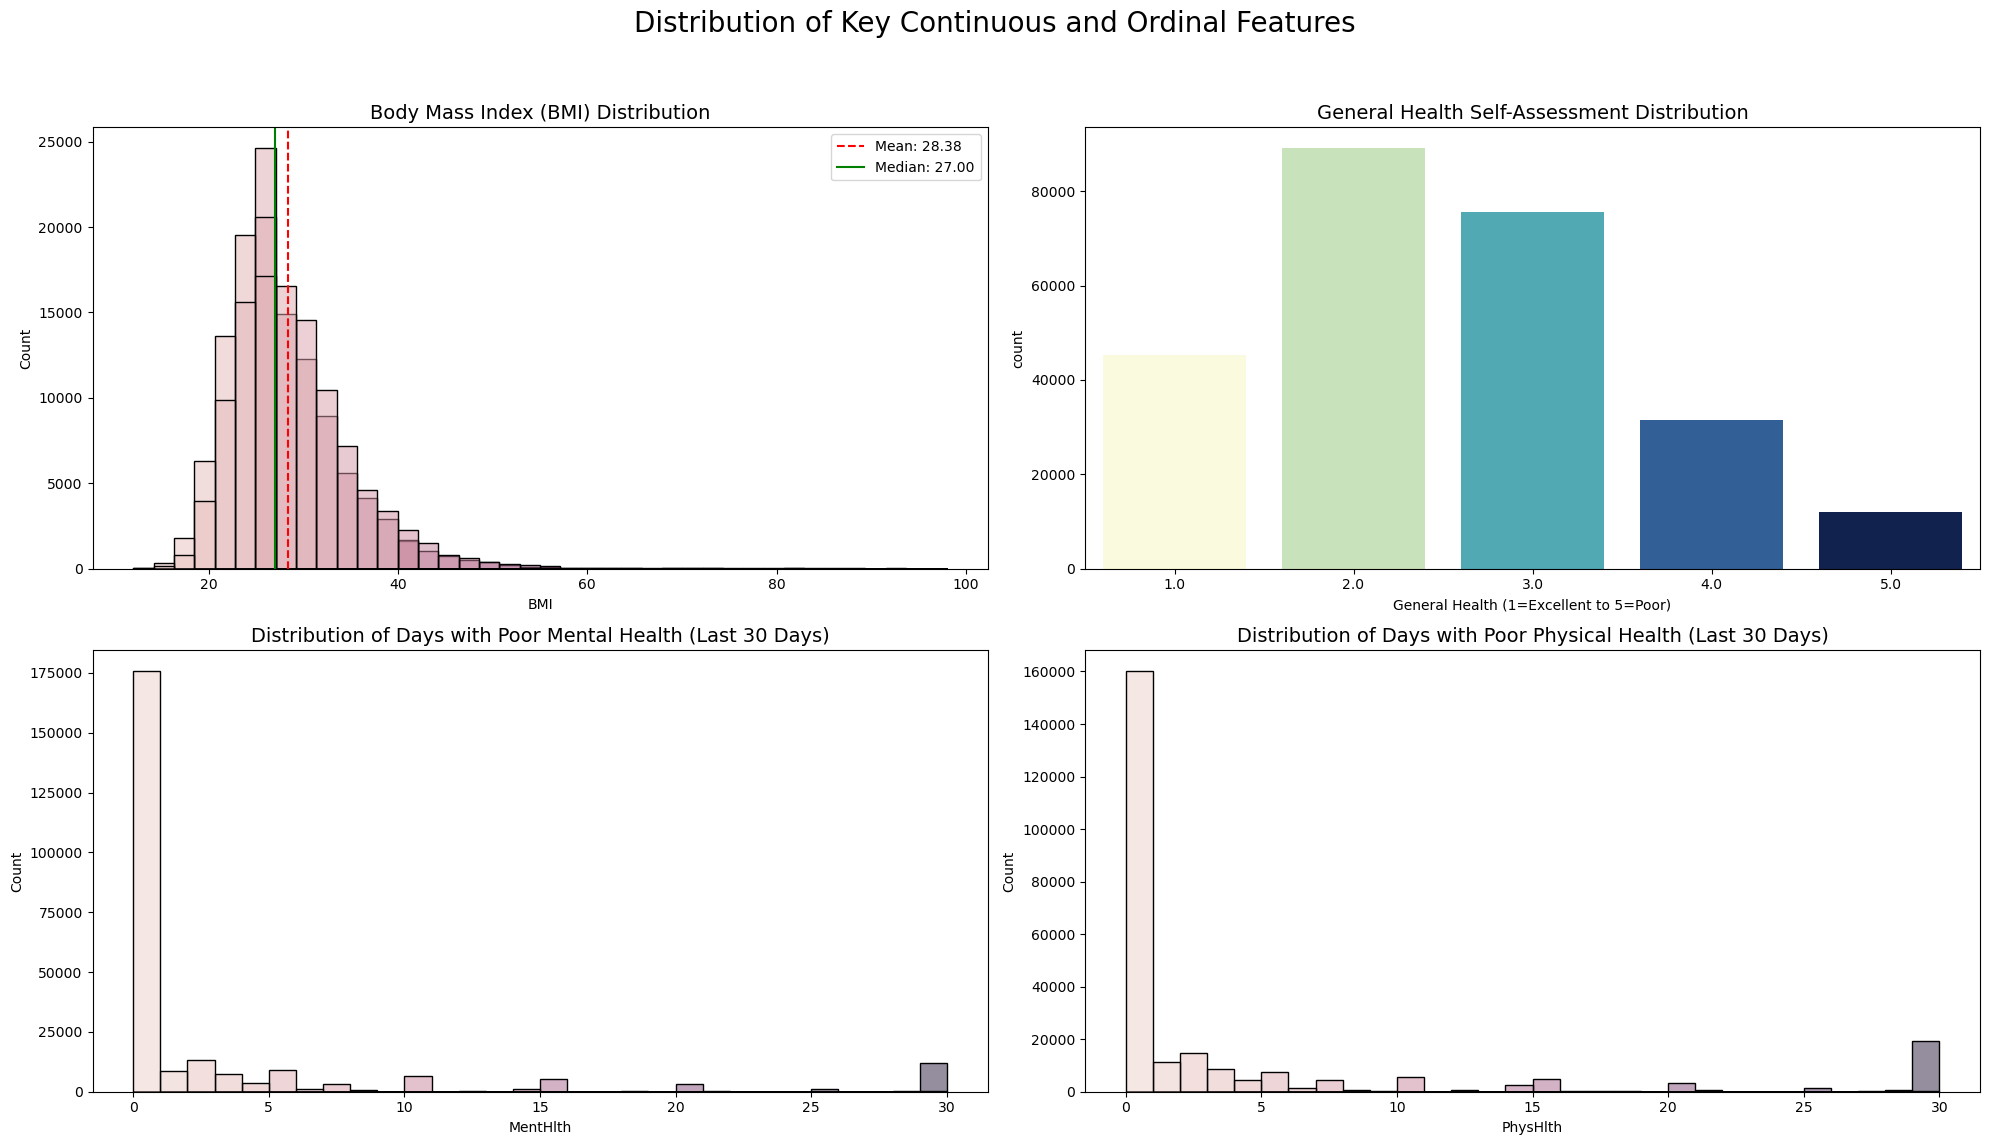

In [7]:
# Create a figure for the subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Distribution of Key Continuous and Ordinal Features', fontsize=20)

# 1. BMI Distribution
sns.histplot(ax=axes[0,0],data=df,x='BMI',kde=True,
             bins=40,color='skyblue',hue='BMI',legend=False)
axes[0, 0].set_title('Body Mass Index (BMI) Distribution', fontsize=14)
axes[0, 0].axvline(df['BMI'].mean(), color='red', linestyle='--', label=f"Mean: {df['BMI'].mean():.2f}")
axes[0, 0].axvline(df['BMI'].median(), color='green', linestyle='-', label=f"Median: {df['BMI'].median():.2f}")
axes[0, 0].legend()

# 2. General Health Distribution
sns.countplot(ax=axes[0,1],data=df,x='GenHlth',palette='YlGnBu',hue='GenHlth',legend=False)
axes[0, 1].set_title('General Health Self-Assessment Distribution', fontsize=14)
axes[0, 1].set_xlabel('General Health (1=Excellent to 5=Poor)')

# 3. Mental Health Days Distribution
sns.histplot(ax=axes[1,0],data=df,x='MentHlth',bins=30,color='salmon',hue='MentHlth',legend=False)
axes[1, 0].set_title('Distribution of Days with Poor Mental Health (Last 30 Days)', fontsize=14)

# 4. Physical Health Days Distribution
sns.histplot(ax=axes[1,1],data=df,x='PhysHlth',bins=30,color='red',hue='PhysHlth',legend=False)
axes[1, 1].set_title('Distribution of Days with Poor Physical Health (Last 30 Days)', fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()